# Analysis of Gun Violence in the United States 2013-2018

**Author:** Susan Wen

Special thanks and credits to the Gun Violence Archive and James Ko (creator of the repository from which the data for this tutorial is obtained).

## Introduction

The 2nd Amendment of the United States of America Constitution states:

> A well regulated Militia, being necessary to the security of a free State, the right of the people to keep and bear Arms, shall not be infringed.

Whatever one's thoughts on gun rights are, it is an undeniable truth that gun violence is like a disease running through the United States. America has some of the most gun violence in the world, only having less deaths than poor, third world countries, many of which are embroiled in civil conflicts [[Source]](https://www.npr.org/sections/goatsandsoda/2021/03/24/980838151/gun-violence-deaths-how-the-u-s-compares-to-the-rest-of-the-world).


Due to the vast amount of tragedy, gun violence incidents have many data points to analyze and questions to ask such as:

1. Has gun violence increased in the recent years?
2. When does gun violence occur most frequently? What patterns can we see?
3. Where does gun violence occur most frequently? Does that change over time?

Amongst other questions.

Through applying data science techniques like regression and machine learning, scientists can even begin to predict factors and outcomes of gun violence incidents.

<hr>

This is a tutorial walking through the data science pipeline in the context of analyzing gun violence in the United States between 2013 to 2018.

Although this tutorial will likely not make any big splashes, analysis of trends and predictions in gun violence in the United States may help push forward policy to reduce future firearm-related tragedies. Looking at gun violence data can not only inform people on how to explore data but also on how to move policy forward to help save lives.

Let's get started.

### Gathering Data

First, we need to obtain data.

Fortunately, data on gun violence is already available on the internet in processed form, allowing me to skip the steps of scraping the internet for information. In fact, the following dataset from which I obtain the data for this tutorial contains a wealth of information that I would not be able to get by personally scraping within the short period of time at the end of a school semester.

[This repository of Gun Violence Archive data](https://github.com/jamesqo/gun-violence-data), which scraped and formatted information from the [Gun Violence Archive](gunviolencearchive.org), is a large dataset of over 260k entries between January 2013 and March 2018 inclusive. The dataset claims to contain "all recorded gun violence incidents in the US" within the time period with the following caveats noted in the repository README:

> The list of incidents from 2013 is not exhaustive; only 279 incidents from that year were catalogued.

> 2 incidents were manually removed from the dataset: the [Las Vegas mass shooting incident](http://www.gunviolencearchive.org/download/las-vegas-shooting.pdf) [October 2017] and [incident 1081885](http://www.gunviolencearchive.org/incident/1081885) [February 2018].


I downloaded DATA_01-2013_03-2018.tar.gz from the repository and uncompressed it (```tar -xf DATA_01-2013_03-2018.tar.gz```) to get stage3.csv, which is a csv file containing the data as mentioned above.

In [52]:
# Import libraries (general)
import pandas as pd
import numpy as np

In [53]:
# Import data
data = pd.read_csv('stage3.csv')
data.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0


Columns are elaborated on in [this table in the repository README](https://github.com/jamesqo/gun-violence-data#data-format) but are generally self-explanatory. Additionally, note that lists and dictionaries are formatted in strings as follows:

> Each list is encoded as a string with separator ```||```. For example, ```"a||b"``` represents ```['a', 'b']```.

> Each dict is encoded as a string with outer separator ```||``` and inner separator ```::```. For example, ```0::a||1::b``` represents ```{0: 'a', 1: 'b'}```.

### Processing Data

#### String to Data Structure Conversion

While the data is mostly cleaned and displayed by James Ko (repository creator), the novel list and dictionary format as strings may prove to be a hinderance if intending to use the information in any column that is thus formatted (for example, the participant_* columns).

As such, we can convert the strings to Python data structures (lists and dicts) for easier access.

In [54]:
# Import ast, the Python library for abstract syntax trees
# This library allows us to easily parse grammars

import ast

In [55]:
# Define two functions based off of the rules Ko described

def extract_list(str):
    """
    Assuming that 'each list is encoded as a string with separator ||,'
    this function will return a list of the elements as strings.
    """
    
    if str is np.nan:
        return np.nan
    
    return str.split("||")

def extract_dict(str, int_int=False):
    """
    Assuming that 'each dict is encoded as a string with outer 
    separator || and inner separator ::,' this function will return
    a dict with integer keys and string values.
    
    Unless int_int is passed in true. In which case, integer values.
    """
    
    if str is np.nan:
        return np.nan
    
    if int_int:
        col = ":" 
        paren = "}"
        com = ","
    else:
        col = ":'" 
        paren = "'}"
        com = "',"
    
    # convert string to resemble a Python dict
    str = str.replace("::", col)
    str = str.replace("||", com)
    str = "{"+str+paren
    
    # the dict-string can be directly converted to dict
    try:
        return ast.literal_eval(str) 
    
    # when testing the function on columns such
    # as gun_stolen, errors were found in which the
    # strings in the data were poorly formatted
    # and ":" was used instead of "::" and "|"
    # instead of "||"
    # catch the error and reformat
    except SyntaxError:
        str = str.replace(":", col)
        str = str.replace("|", com)
        return ast.literal_eval(str) 

##### Lists

The following columns of the original data are formatted strings representing lists of strings: incident_characteristics, sources. As we do not care about sources, we may simply convert incident_characteristics.

In [56]:
# Apply list extraction from formatted string function onto column in dataframe

data.incident_characteristics = data.incident_characteristics.apply(lambda x: extract_list(str=x))

##### Dicts

The following columns of the original data are formatted strings representing dict[int, str]: gun_stolen, gun_type, participant_age_group, participant_gender, participant_name, participant_relationship, participant_status, participant_type. (We do not care about participant name)

The following column of the original data is formatted strings representing dict[int, int]: participant_age

**Note:** Poorly formatted strings were found in the data, prompting some error catching code (seen above in functions) to address and retain the information from the mal-formatted strings. 

**Note 2:** Additionally, if a user desires to convert participant_name, take into account that names may have ' or " that can cause issues with the implementation of the functions currently.

In [57]:
# Loop through dict[int, str] columns to apply dict extraction from formatted string function
# onto column in dataframe

cols = ["gun_stolen", 
        "gun_type", 
        "participant_age_group", 
        "participant_gender", 
        "participant_relationship", 
        "participant_status", 
        "participant_type"]

for col in cols:
    data[col] = data[col].apply(lambda x: extract_dict(str=x))

In [58]:
# Apply dict[int, int] extraction from formatted string function onto column in dataframe

data.participant_age = data.participant_age.apply(lambda x: extract_dict(str=x, int_int=True))

#### Dropping Columns

A bit less heavy than converting formatted strings to easily usable data structures is getting dropping data that we do not need. For easier readability of the data, as this tutorial will not use any of the urls provided in the data, we can drop columns that relate to urls such as: incident_url, source_url, etc.

We can additionally drop the 'notes' column as it contains overly specific annotations that will not be used.

In [59]:
data.drop(inplace=True, columns=['incident_url', 
                                'source_url',
                                'incident_url_fields_missing', 
                                'sources',
                                'notes',
                                'participant_name'])

Although I currently drop this data, this does not mean that all remaining columns will necessarily be used in the tutorial. In fact, to use the dicts and list extracted in a meaningful way, they may need to be further processed.

However, more specific use cases will be done in the section of analysis relevant to them. To be explored below:

## Exploratory Data Analysis

Once data is obtained, we can begin doing exploratory data analysis by visualizing and trying to see if any trends can be identified within our data. Let's first import some basic tools:

In [60]:
# Import basic visualization tools

%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

### Distribution

#### Over Time

We can look at the data to get a sense of gun violence casualty patterns over the time period of the data. When does gun violence occur? Did gun violence increase between 2013 to 2018? We may not be able to explicitly answer these questions, but they are certainly worth asking.

We will have to extract some information from the date column in the data before proceeding.

In [ ]:
# Import time and date manipulation library

import datetime

In [74]:
# Make a copy of the data and extract the year and month into separate columns

df = data.copy()
df['year'] = df.date.apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").year)
df['month'] = df.date.apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").month)

##### Annual

Let's look at gun violence over time year by year first. To start off, we can create scatterplots of individual incidents to see if a trend on the number of casualties appears over time.

Text(0.5, 1.0, 'Deaths in Incidents 2013-2018')

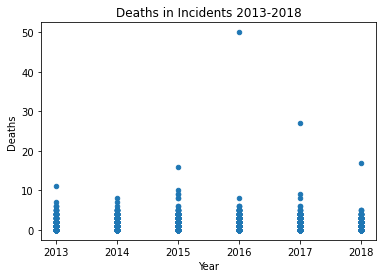

In [95]:
# Plot using pandas matplotlib scatterplot

ax = df.plot.scatter(x='year', y='n_killed')
ax.set_xlabel('Year')
ax.set_ylabel('Deaths')
ax.set_title('Deaths in Incidents 2013-2018')

The majority of incidents across the years 2013 to 2018 appear to have deaths in the single digits or low teens. (Note that the 2013 and 2018 year data does not cover the whole year). Years have singular incidents that are extreme outliers with high death count such as one event in 2016, which has around 50 deaths.

We cannot see much of a trend. Rather, the trend may be to say that the death count of incidents stays the same per incident over these years.

Text(0.5, 1.0, 'Injuries in Incidents 2013-2018')

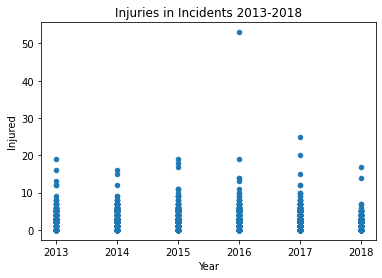

In [94]:
# Plot using pandas matplotlib scatterplot

ax = df.plot.scatter(x='year', y='n_injured')
ax.set_xlabel('Year')
ax.set_ylabel('Injured')
ax.set_title('Injuries in Incidents 2013-2018')

Similarly appears to hold for number of injuries over years. However, the range of injury counts is greater than that of death counts.

A scatterplot of many individual data points is good, but how about we aggregate the data to get less points on a graph? Let's start with asking the same questions on how casualty counts appear per incident over the years.

We can also make a hypothesis. Based on the above scatterplots, I predict that the mean deaths and injuries across the years will be very similar.

Text(0.5, 1.0, 'Mean Casualties in Incidents 2013-2018')

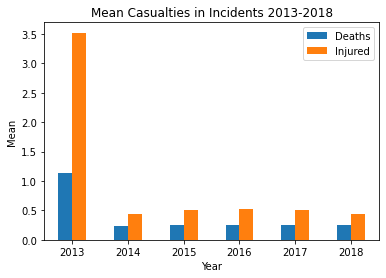

In [98]:
# Aggregate values by year to mean
annual_mean = df.groupby(['year']).mean()

# Plot using pandas matplotlib barplot
ax = annual_mean[['n_killed', 'n_injured']].plot.bar(rot=0)
ax.legend(['Deaths', 'Injured'])
ax.set_xlabel('Year')
ax.set_ylabel('Mean')
ax.set_title('Mean Casualties in Incidents 2013-2018')

The above plot supports my conjecture. 2014 through 2018 have similar bars and numbers on the mean number of casualties per incident, the number of both deaths and injured less than even one person on average. However, the 2013 bars blow the others out of the water, towering much higher over the years following.

You may ask: was 2013 particularly violent? What happened then?

Unfortunately, the 2013 data is noted by the dataset owner as being incomplete. The same holds for the 2018 data, being only the first three months of the year. The 2013 data may have bias in the selection of incidents that makes it appear much bloodier than the following years.

Interestingly, the 2018 data follows the pattern of the years previous to it.

The missing values in the dataset for the two years warrants further data gathering and exploration if you are interested, but this tutorial will continue on with the data and make note of this issue when relevant.

Overall, we may guess that the outcomes of gun violence on an incident to incident basis stayed constant between at least 2014 to 2017.



What about altogether in a year rather than in the context of singular incidents?

Text(0.5, 1.0, 'Total Casualties in Incidents 2013-2018')

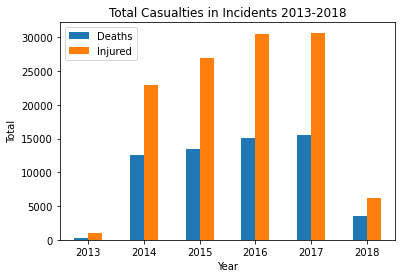

In [99]:
# Aggregate values by year to sum
annual_sum = df.groupby(['year']).sum()

# Plot using pandas matplotlib barplot
ax = annual_sum[['n_killed', 'n_injured']].plot.bar(rot=0)
ax.legend(['Deaths', 'Injured'])
ax.set_xlabel('Year')
ax.set_ylabel('Total')
ax.set_title('Total Casualties in Incidents 2013-2018')

Note that total counts will not be representative for 2013 and 2018 due to missing data. I have left the bars in the graph to show you, but the rows can be dropped, especially if trying to put a regression line onto the graph.

An upward trend appears to appear in casualties from 2014 to 2017.

Text(0.5, 1.0, 'Total Incidents 2013-2018')

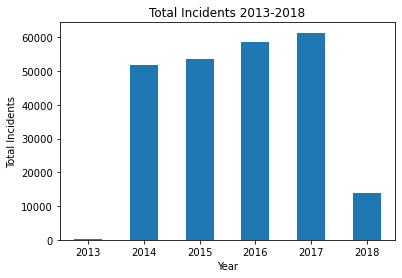

In [100]:
# Aggregate values by year to count
annual_count = df.groupby(['year']).count()

# Plot using pandas matplotlib barplot
ax = annual_count['n_killed'].plot.bar(rot=0)
ax.set_xlabel('Year')
ax.set_ylabel('Total Incidents')
ax.set_title('Total Incidents 2013-2018')

Similarly, 2013 and 2018 will again not be representative if counting not casualties but just gun violence incidents across the years. Again, an upward trend appears to show itself between 2014 to 2017, hinting that gun violence incidents were on the rise in that period of time.

##### Monthly

How about which month gun violence is more likely to happen?

Before we start, as monthly analysis does not let us see like above how the data in 2013 and 2018 is smaller in amount than the middle years, we should drop them from our month-based analysis to reduce biases from missing data.

In [121]:
# Select only the rows where the year is not 2013 or 2018

df2 = df[(df.year != 2013) & (df.year != 2018)]

Afterward, we can start plotting.

Text(0.5, 1.0, 'Mean Casualties in Incidents by Month')

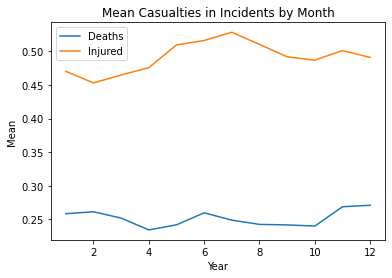

In [122]:
# Aggregate values by month to mean
monthly_mean = df2.groupby(['month']).mean()

# Plot using pandas matplotlib line plot
ax = monthly_mean[['n_killed', 'n_injured']].plot.line()
ax.legend(['Deaths', 'Injured'])
ax.set_xlabel('Month')
ax.set_ylabel('Mean')
ax.set_title('Mean Casualties in Incidents by Month')

While the average amount of casualties by month does not appear to follow a linear pattern, deaths and injuries match up in the shape of their line plots. In both, slight dips in number of casualties appear around April and September. On the other hand, more casualties appear to happen per incident in the winter and summer.

Text(0.5, 1.0, 'Total Casualties in Incidents by Month')

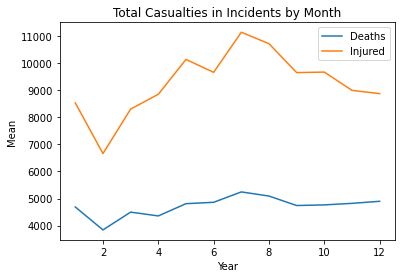

In [123]:
# Aggregate values by month to sum
monthly_sum = df2.groupby(['month']).sum()

# Plot using pandas matplotlib line plot
ax = monthly_sum[['n_killed', 'n_injured']].plot.line()
ax.legend(['Deaths', 'Injured'])
ax.set_xlabel('Month')
ax.set_ylabel('Total')
ax.set_title('Total Casualties in Incidents by Month')

While summer appears to continue the trend of casualties being higher, the gross number un-averaged is a clear peak. That implies a high number of incidents in general in the summer. Opposite is February which has a visible dip in number of casualties of both sorts.

When counting total casualties, injuries in the summer become much more than deaths, the line plot's peak much steeper for injured compared to for deaths in the same periods.

Text(0.5, 1.0, 'Total Incidents by Month')

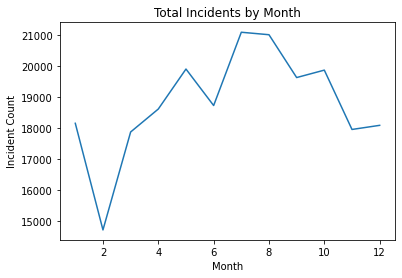

In [126]:
# Aggregate values by month to count
monthly_count = df2.groupby(['month']).count()

# Plot using pandas matplotlib line plot
ax = monthly_count['n_killed'].plot.line()
ax.set_xlabel('Month')
ax.set_ylabel('Incident Count')
ax.set_title('Total Incidents by Month')

A similar pattern to total casualties by month can be seen in total incidents per month. For what reason or another, February had few incidents in 2014 to 2017. Summer months had many incidents.

Perhaps this can be attributed to weather conditions sending more people out mid-years versus in February, which can be a snowy month.

### Regression

After making a number of graphs to get a sense for the data, we can move onto finding regression models to write out an explicit, numerical way of representing trends. We can continue with looking at the data over years, again dropping 2013 and 2018 to prevent the biases.

Let's focus on number of incidents overall rather than digging back into casualties here. And let's also see where we can get with a linear regression model.

In [145]:
# Import tools for finding regression model

import statsmodels.api as sm
import statsmodels.formula.api as smf

#### Regression by Year

In the previous section, we may have noticed some sort of increasing trend over 2014 to 2017 (the usable data) for the total number of gun violence incidents. Let's take a look at that first with just year.

In [157]:
# Aggregate values by year to count 

annual_count = df2.groupby(['year']).count()

Columns such as n_killed will hold the number of incidents occured. Not all columns were required in the original dataset, so only required columns will fully count the incidents. Refer to dataset repository README for more information.

Text(0.5, 1.0, 'Total Incidents 2014-2017')

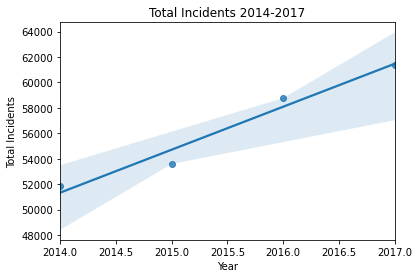

In [179]:
# Use seaborn to plot annual count with a regression line
# seaborn is convenient to use due to simplicity of syntax 
# compared to matplotlib (but can be limiting)

ax = sns.regplot(data=annual_count, x=annual_count.index, y="n_killed")
ax.set_xlabel('Year')
ax.set_ylabel('Total Incidents')
ax.set_title('Total Incidents 2014-2017')

I plotted deaths by year once more (this time with seaborn) to illustrate that a trend could be seen even if by eyeballing.

In [169]:
# Identify columns to be used as variables
X = annual_count.index
Y = annual_count[['n_killed']]

# Fit using statsmodel to a Least Squares Linear Regression
Xx = sm.add_constant(X)
fit = sm.OLS(Y, Xx).fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:               n_killed   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     56.88
Date:                Sat, 04 Dec 2021   Prob (F-statistic):             0.0171
Time:                        03:45:27   Log-Likelihood:                -31.932
No. Observations:                   4   AIC:                             67.86
Df Residuals:                       2   BIC:                             66.64
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.761e+06   9.04e+05     -7.480      0.0

/opt/conda/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


The regression equation derived is as follows: ```f(x) = 3382.5x + -6.761×10^6```

* f(x): the number of incidents in the year 
* x: the year

We should ask if this regression model is worth anything. There is a decently high positive R value, which corresponds with an increasing trend. However, let's take a look at the p-value instead.

The p-value is 0.017, which is less than the classic 0.05 alpha, telling us that there is a relationship that can be drawn. In other words, we can reject the null hypothesis that there is no relationship between years and number of incidents. The number of gun violence incidents increased over that period of time, which may hint at an overall increasing trend over time.

There is a **major** caveat to this regression model: the lack of data points.

Can we really say much with only 4 full years? This is question that warrants further exploration and gathering of more years of data, which I will leave the reader to do if you are so inclined.

#### Adding a Categorical Variable to Regression

Next, we might want to look at a linear regression model with multiple variables. In fact, we might want to look at it with categorical variables such as states.

For example, we might expect states of certain demographics to have higher rates of gun violence. Or simply for states with higher populations to have higher incident counts. Is this true? Can we find a relationship?

Let's continue with that line of thought.

In [186]:
# Aggregate to count instances of gun violence
# by year and state (2014-2017)

year_state = df2.groupby(['year', 'state']).count()

# reset index to extract year, state columns
year_state = year_state.reset_index()

year_state.head()

,year,state,incident_id,date,city_or_county,address,n_killed,n_injured,congressional_district,gun_stolen,...,n_guns_involved,participant_age,participant_age_group,participant_gender,participant_relationship,participant_status,participant_type,state_house_district,state_senate_district,month
0,2014,Alabama,1318,1318,1318,1257,1318,1318,1315,174,...,174,639,1182,1177,32,1192,1232,1314,1315,1318
1,2014,Alaska,146,146,146,132,146,146,132,32,...,32,77,101,99,3,102,104,132,14,146
2,2014,Arizona,556,556,556,514,556,556,556,114,...,114,281,450,432,18,456,459,556,556,556
3,2014,Arkansas,572,572,572,500,572,572,572,96,...,97,366,498,492,16,500,532,572,572,572
4,2014,California,3732,3732,3732,3544,3732,3732,3712,295,...,295,1825,2930,3295,40,2960,3501,3712,3712,3732


In [187]:
# Fit regression model using statsmodel once more
# To add in categorical variable, we can write out a formula as such:
# value ~ numerical_var + C(categorical_var)

fit = smf.ols(formula='n_killed ~ year + C(state)', data=year_state).fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:               n_killed   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     69.16
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           3.87e-83
Time:                        05:17:15   Log-Likelihood:                -1378.0
No. Observations:                 204   AIC:                             2860.
Df Residuals:                     152   BIC:                             3033.
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

Above, we once more used statsmodel to fit a linear regression model. Note that due to how statsmodel deals with "dummy variables," one instance of the states categorical variable (Alabama) is lumped into the year coefficient, so we can consider the other states to be numbers in reference to Alabama's incident count impact.

Most states have low p-values around 0, but some such as Wisconsin have larger values like 0.297 that imply this model may not be so great in those cases.

Some states of interest might include California, Florida, and Illinois, which all have coefficients over 2000, telling us (at least by this model) that they have high incident counts of gun violence. While California has a huge population, Florida is a tad smaller and Illinois even more, which poses a question:

Why?

To get more meaning out of a regression model that takes into account states, we could also further explore by explicitly comparing to state population (an incident to population ratio versus direct incident count). However, that information is not included in this data.

As usual, if interested, it is certainly worth going out and doing yourself!

### Spatial Visualization

Following the brief exploration in regression and the possible use of states as a categorical variable, you might be itching to visualize the distribution of the incidents on a map. Gun violence is a very physical, tangible, and terrible thing that does not happen in a void but rather in real places to real people.

Let's try putting some of it on a map to see what was going on in the period of this data.

In [331]:
# Import library for displaying data on maps

import folium

Coordinates for a map of the United States were taken from this [reference](https://www.python-graph-gallery.com/292-choropleth-map-with-folium).

In [340]:
# Create folium map

m = folium.Map(location=[40, -95], zoom_start=4)

Plotting 260k markers on a map would be insane even if we have a decently large map created here with folium. Thus, we can start by filtering out a subset of the data we really want to look at.

For example, how about gun violence incidents with very high death counts? Where did gun violence incidents where many people die often happen?

In [341]:
# Use pandas quantile to find the 99.5th percentile cases by
# death count for gun violence incidents where at least 1 person
# was killed

per = df[ df.n_killed > 0 ].n_killed.quantile(q=0.995)
per

3.0

In [342]:
# Filter the data to contain only the percentile as found above
df3 = df[ df.n_killed > per ]

# Check for missing values
df3.count()

incident_id                 207
date                        207
state                       207
city_or_county              207
address                     206
n_killed                    207
n_injured                   207
congressional_district      199
gun_stolen                  152
gun_type                    152
incident_characteristics    207
latitude                    202
location_description         52
longitude                   202
n_guns_involved             152
participant_age             205
participant_age_group       207
participant_gender          207
participant_relationship     91
participant_status          207
participant_type            207
state_house_district        182
state_senate_district       188
year                        207
month                       207
dtype: int64

In [343]:
# Plotting location markers requires valid longitude and latitude
# Thus, we unfortunately have to drop 5 incidents with missing values

df3 = df3.dropna(subset=['longitude', 'latitude'])

Once we have the dataframe filtered and formatted, we can move into putting the incidents onto the map.

In [344]:
# Create a dictionary of icons matching year to an icon

icons = {
    2013: 'pink',
    2014: 'red',
    2015: 'orange',
    2016: 'yellow',
    2017: 'green',
    2018: 'blue'
}

In [347]:
%%capture --no-display
# The method of passing in icon colors can throw a warning
# but it is of no problem. We can use this line to hide
# the warning.

# Iterating through the dataframe with the gun violence incidents
# add each one to the map

for index, row in df3.iterrows():
    folium.Marker(location=[row['latitude'], row['longitude']],
                  popup=str(row['n_killed']) + " deaths",
                  icon=folium.Icon(color= icons[ int(row['year']) ] ),
                 ).add_to(m)
m

Now that we have a map, let's walk through two things:
1. What is the map displaying?
2. What can we say based off of this map?

// TODO

### Machine Learning

// TODO

In [ ]:
# Import machine learning library contents

from sklearn.model_selection import train_test_split

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier as DTC

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# TODO

## Conclusion

// TODO

## Additional Resources

// TODO